In [1]:
# imports
import utils # from The Google Research Authors
import torch as t, torch.nn as nn, torch.nn.functional as tnnF, torch.distributions as tdist
from torch.utils.data import DataLoader, Dataset
import torchvision as tv, torchvision.transforms as tr
import os
import sys
#import ipdb
import numpy as np
import wideresnet # from The Google Research Authors
import json
import re
import pandas as pd

%matplotlib inline
import utils
import torch as t, torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision as tv, torchvision.transforms as tr
import os
import sys
import argparse
import numpy as np
import wideresnet
import pdb
from matplotlib import pyplot as plt
import random

In [1]:
import sys
sys.executable

'/usr/local/anaconda3/envs/JEM/bin/python'

In [3]:
def get_exp_dirs(basedir,exp,verbose=True):
    pre = 'run' if exp!='ours' else 'cvr'
    load_dirs = [i for i in os.listdir(os.path.join(basedir,exp)) if i[0:3]==pre]
    if verbose: print(load_dirs)
    return load_dirs

def set_check_flag(exp):
    ipt = input(f'Check epoch times for {exp}? (y/n) ')
    if ipt=="y":
        return True
    else:
        return False

def manual_search_start(df):
    starts = np.where(df[:,0]=='start')[0]
    print(f'We have starts at {starts}. Total rows: {df.shape[0]}.')
    start=0
    if df.shape[0]!=201: 
        start = int(input('Which start to use? (int)'))
        #margin = int(input('Enter number of surrounding rows to see: (0+) '))
        #output_starts(df,starts,margin)
    return start

def output_starts(df,starts,margin):
    for start in starts:
        start = int(start)
        for row in range((start-margin),(start+margin+1)):
            if row>=0 and row<df.shape[0]: print(row," -- ",df[row,])
        print("\n") 
    
def process_times(df,start,best_epoch):
    timesum, besttimesum, epoch_count = (0,0,0)
    for row in range(start,df.shape[0]):
            if df[row,0] != 'start':
                epoch_time = df[row,1]-df[row-1,1]
                if int(df[row,0]) <= best_epoch: besttimesum+=epoch_time
                timesum += epoch_time
                epoch_count += 1
    return timesum, besttimesum, epoch_count
       
def get_exp_name(exp):
    if exp=='theirs':
        return 'SGLD'
    elif exp=='ours':
        return 'E. Var.'
    elif exp=='baseline':
        return 'Baseline'
    else:
        return 'error'
    
    
    
path = os.path.join    
timedf = pd.DataFrame(columns=['exp','run','best_epoch','total_time','time_til_best','epochs','ave_best','ave_all'])
basedir = './production_cali_cf100/'
for exp in ['theirs','ours','baseline']:
    load_dirs = get_exp_dirs(basedir,exp)


    check_input = set_check_flag(exp)
    for load_dir in load_dirs:
        ldir = path(basedir,exp,load_dir)
        best_epoch=int(t.load(path(ldir,'best_valid_ckpt.pt'))['epoch'])
        df=pd.read_csv(path(ldir,'epoch_times.csv'),header=None).to_numpy()

        start=0
        if check_input==True: start=manual_search_start(df)
        timesum, besttimesum, epoch_count = process_times(df,start,best_epoch)
        timedf.loc[len(timedf.index)] = [get_exp_name(exp), load_dir, best_epoch, timesum, besttimesum, epoch_count,besttimesum/best_epoch,timesum/epoch_count]

    


NameError: name 'pd' is not defined

In [49]:
timedf


,exp,run,best_epoch,total_time,time_til_best,epochs,ave_best,ave_all
0,SGLD,run1,54,123449.680339,109202.645804,200,2022.271219,617.248402
1,SGLD,run4,35,77983.924389,72062.188021,200,2058.919658,389.919622
2,SGLD,run3,15,39495.340837,32140.937530,200,2142.729169,197.476704
3,SGLD,run2,51,117000.479673,103204.923739,200,2023.625956,585.002398
4,SGLD,run5,54,130403.771160,108052.961611,200,2000.980771,652.018856
5,SGLD,run12,43,105438.291573,86464.094652,200,2010.792899,527.191458
6,SGLD,run11,22,52402.464597,46066.119234,200,2093.914511,262.012323
7,SGLD,run9,13,34469.383890,27806.314762,200,2138.947289,172.346919
8,SGLD,run6,11,30849.977691,23799.799745,200,2163.618159,154.249888
9,SGLD,run8,18,45235.975777,38181.263268,200,2121.181293,226.179879


In [50]:
timedf['best_min']=timedf['ave_best']/60
timedf['all_min']=timedf['ave_all']/60

In [51]:
timedf

,exp,run,best_epoch,total_time,time_til_best,epochs,ave_best,ave_all,best_min,all_min
0,SGLD,run1,54,123449.680339,109202.645804,200,2022.271219,617.248402,33.704520,10.287473
1,SGLD,run4,35,77983.924389,72062.188021,200,2058.919658,389.919622,34.315328,6.498660
2,SGLD,run3,15,39495.340837,32140.937530,200,2142.729169,197.476704,35.712153,3.291278
3,SGLD,run2,51,117000.479673,103204.923739,200,2023.625956,585.002398,33.727099,9.750040
4,SGLD,run5,54,130403.771160,108052.961611,200,2000.980771,652.018856,33.349680,10.866981
5,SGLD,run12,43,105438.291573,86464.094652,200,2010.792899,527.191458,33.513215,8.786524
6,SGLD,run11,22,52402.464597,46066.119234,200,2093.914511,262.012323,34.898575,4.366872
7,SGLD,run9,13,34469.383890,27806.314762,200,2138.947289,172.346919,35.649121,2.872449
8,SGLD,run6,11,30849.977691,23799.799745,200,2163.618159,154.249888,36.060303,2.570831
9,SGLD,run8,18,45235.975777,38181.263268,200,2121.181293,226.179879,35.353022,3.769665


In [52]:
timedf.groupby('exp')['best_epoch','best_min','all_min'].agg(['mean','std'])

/srv/ipykernel_22/1477346745.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  timedf.groupby('exp')['best_epoch','best_min','all_min'].agg(['mean','std'])


best_epoch              best_min             all_min          
                mean        std       mean       std      mean       std
exp                                                                     
Baseline  192.916667   5.035480   2.851377  1.059690  2.834767  1.053358
E. Var.   190.583333   4.122187   5.124009  1.757343  5.099432  1.776786
SGLD       34.666667  17.603374  34.545017  0.955882  6.831107  3.252595

In [7]:
from tqdm import tqdm
# Sampling
from tqdm import tqdm
t.backends.cudnn.benchmark = True
t.backends.cudnn.enabled = True
seed = 1
im_sz = 32
n_ch = 3
n_classes = 100

In [8]:
class DataSubset(Dataset):
    def __init__(self, base_dataset, inds=None, size=-1):
        self.base_dataset = base_dataset
        if inds is None:
            inds = np.random.choice(list(range(len(base_dataset))), size, replace=False)
        self.inds = inds

    def __getitem__(self, index):
        base_ind = self.inds[index]
        return self.base_dataset[base_ind]

    def __len__(self):
        return len(self.inds)

In [9]:
class F(nn.Module):
    def __init__(self, depth=28, width=2, norm=None):
        super(F, self).__init__()
        self.f = wideresnet.Wide_ResNet(depth, width, norm=norm)
        self.energy_output = nn.Linear(self.f.last_dim, 1)
        self.class_output = nn.Linear(self.f.last_dim, 100)

    def forward(self, x, y=None):
        penult_z = self.f(x)
        return self.energy_output(penult_z).squeeze()

    def classify(self, x):
        penult_z = self.f(x)
        return self.class_output(penult_z)

In [10]:
class CCF(F):
    def __init__(self, depth=28, width=2, norm=None):
        super(CCF, self).__init__(depth, width, norm=norm)

    def forward(self, x, y=None):
        logits = self.classify(x)
        if y is None:
            return logits.logsumexp(1)
        else:
            return t.gather(logits, 1, y[:, None])

In [11]:
def cycle(loader):
    while True:
        for data in loader:
            yield data

def init_random(bs):
    return t.FloatTensor(bs, 3, 32, 32).uniform_(-1, 1)

In [12]:
def energy_dirivative(f,args,device):
    def grad_norm(x):
        x_k = t.autograd.Variable(x, requires_grad=True)
        f_prime = t.autograd.grad(f(x_k).sum(), [x_k],create_graph=True, retain_graph=True)[0]
        grad = f_prime.view(x.size(0), -1)
        #print(grad)
        return grad.norm(p=2, dim=1)
    
    transform_test = tr.Compose(
        [tr.ToTensor(),
         tr.Normalize((.5, .5, .5), (.5, .5, .5)),
         lambda x: x + args.sigma * t.randn_like(x)]
    )
    
    dset_real = tv.datasets.CIFAR100(root="../data", transform=transform_test, download=True, train=args.train)
    dload_real = DataLoader(dset_real, batch_size=100, shuffle=False, num_workers=4, drop_last=False)

    real_scores=[]
    for x, y in dload_real:
        x = x.to(device)
        scores = grad_norm(x).detach().cpu()
        real_scores = np.append(real_scores,scores.numpy())
        
    return real_scores

In [13]:
def main(args):
    t.manual_seed(seed)
    if t.cuda.is_available():
        t.cuda.manual_seed_all(seed)

    device = t.device('cuda' if t.cuda.is_available() else 'cpu')

    model_cls = F if args.uncond else CCF
    f = model_cls(args.depth, args.width, args.norm)
    print(f"loading model from {args.load_path}")

    # load em up
    ckpt_dict = t.load(args.load_path)
    f.load_state_dict(ckpt_dict["model_state_dict"])
    epoch=ckpt_dict['epoch']
    print(f'The epoch used was {epoch}')
    try:
        replay_buffer = ckpt_dict["replay_buffer"]
    except:
        pass

    f = f.to(device)
    return energy_dirivative(f,args,device)
    

In [14]:
# Setup parameters
class eval_args():
    def __init__(self, param_dict):
        self.eval = "OOD" #, type=str, choices=["uncond_samples", "cond_samples", "logp_hist", "OOD", "test_clf", "pri_energy"])
        self.score_fn = "px" #, type=str, choices=["px", "py", "pxgrad"], help="For OODAUC, chooses what score function we use.")
        self.ood_dataset = "svhn" #, type=str, choices=["svhn", "cifar_interp", "cifar_100", "celeba"], help="Chooses which dataset to compare against for OOD")
        self.dataset = "cifar_test" #, type=str, choices=["cifar_train", "cifar_test", "svhn_test", "svhn_train"], help="Dataset to use when running test_clf for classification accuracy")
        self.datasets = [] # help="The datasets you wanna use to generate a log p(x) histogram")
        # optimization
        self.batch_size = 64
        # regularization
        self.sigma = 3e-2
        # network
        self.norm = None #, choices=[None, "norm", "batch", "instance", "layer", "act"])
        # EBM specific
        self.n_steps = 20 # help="number of steps of SGLD per iteration, 100 works for short-run, 20 works for PCD")
        self.width = 10 # help="WRN width parameter")
        self.depth = 28 # help="WRN depth parameter")
        self.uncond = False # "store_true" # help="If set, then the EBM is unconditional")
        self.class_cond_p_x_sample = False #, action="store_true", help="If set we sample from p(y)p(x|y), othewise sample from p(x)," "Sample quality higher if set, but classification accuracy better if not.")
        self.buffer_size = 0
        self.reinit_freq = .05
        self.sgld_lr = 1.0
        self.sgld_std = 1e-2
        # logging + evaluation
        self.save_dir = 'output'
        self.print_every = 100
        self.n_sample_steps = 100
        self.load_path = None
        self.print_to_log = False
        self.fresh_samples = False #", action="store_true", help="If set, then we generate a new replay buffer from scratch for conditional sampling,"  "Will be much slower.")
        self.datasets = []
        self.fig_pre = ""
        self.exp = ""
        self.run = ""
        self.train = True
        
        # set from inline dict
        for key in param_dict:
            #print(key, '->', param_dict[key])
            setattr(self, key, param_dict[key])

In [28]:
lol = []
for run in range(1,13):
    inline_parms = {"load_path": f"./production_cali_cf100/baseline/run{run}/best_valid_ckpt.pt", \
                "dataset": "cifar100_train", "train": False}

    g=main(eval_args(inline_parms))
    lol.append(g)
    print(f'Run {run:2d} is complete!')

| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run1/best_valid_ckpt.pt
Files already downloaded and verified
Run  1 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run2/best_valid_ckpt.pt
Files already downloaded and verified
Run  2 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run3/best_valid_ckpt.pt
Files already downloaded and verified
Run  3 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run4/best_valid_ckpt.pt
Files already downloaded and verified
Run  4 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run5/best_valid_ckpt.pt
Files already downloaded and verified
Run  5 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run6/best_valid_ckpt.pt
Files already downloaded and verified
Run  6 is complete!
| Wide-Resnet 28x10
loading model from ./production_cali_cf100/baseline/run7

In [41]:
lol = []
for run in range(1):
    inline_parms = {"load_path": f"./sgld1/best_valid_ckpt.pt", \
                "dataset": "cifar100_train","train": False}

    g=main(eval_args(inline_parms))
    lol.append(g)
    print(f'Run {run:2d} is complete!')

| Wide-Resnet 28x10
loading model from ./sgld1/best_valid_ckpt.pt
The epoch used was 41
Files already downloaded and verified
Run  0 is complete!


In [42]:
exp='sgld1'

In [43]:
g=np.vstack(lol)
np.save(f'./{exp}/cf100_sgld_energies_test.npy',g)


In [28]:
g=np.load(f'./{exp}/cf100_sgld_energies_test.npy')

In [44]:
#g=np.vstack(lol)
g=g[0]
print(len(g))
#print(g.mean())
print(sum(g)/len(g))

10000
0.4470293989263475


In [45]:
with open(f'./{exp}/train_indices.txt','r') as tif:
    line = [int(i) for i in tif.readlines()[0].split(' ')]
    
gt = []
print(len(line))
for idx in line:
    gt.append(g[idx])
    
print(sum(gt)/len(gt))

45000


IndexError: index 23716 is out of bounds for axis 0 with size 10000

In [38]:
g=gt

In [54]:
print(sum([i>5 for i in g]))

175


In [30]:
len(g)

10000

In [63]:
g=g12.mean(axis=0)
gstd=g12.std(axis=0)

NameError: name 'gstd' is not defined

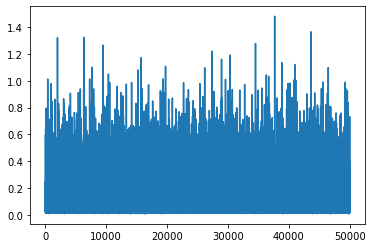

In [61]:
fig = plt.figure()
ax = plt.gca()
ax.plot(np.arange(len(g)),g,alpha=1)
#ax.errorbar(np.arange(len(g)),g,yerr=gstd, fmt='none', ecolor='orange',alpha=1)
ax.fill_between(np.arange(len(g)),g+gstd,g-gstd,color='orange')
ax.plot([0,len(g)],[5,5],color='red')
ax.set_ylim([-2,18])
fig.show()

/usr/local/anaconda3/envs/JEM/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


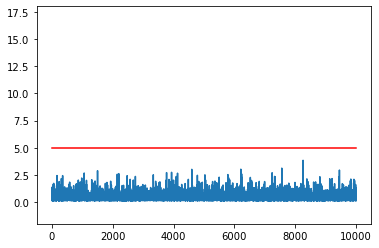

In [46]:
#g=g12.max(axis=0)
#print(g.mean())
fig = plt.figure()
ax = plt.gca()
ax.plot(np.arange(len(g)),g,alpha=1)
ax.plot([0,len(g)],[5,5],color='red')
ax.set_ylim([-2,18])
fig.show()

/usr/local/anaconda3/envs/JEM/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


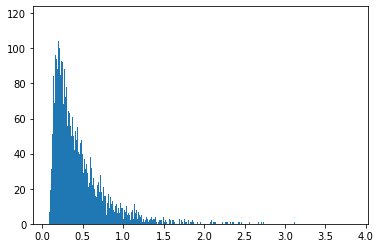

In [47]:
fig = plt.figure()
ax = plt.gca()
ax.hist(g,1000)
fig.show()

In [72]:
len(badimg)

1199

In [74]:
transform_test = tr.Compose([tr.ToTensor()])
dset_real = tv.datasets.CIFAR100(root="../data", transform=transform_test, download=True, train=False)
dload_real = DataLoader(dset_real, batch_size=1, shuffle=False, num_workers=4, drop_last=False)

ls = [0]*10000
imgs=[0]*10000
counter=0
for img, y in dload_real:
    ls[counter]=y.numpy()
    imgs[counter]=img.numpy()
    counter+=1



Files already downloaded and verified


plain
energy_der: 5.44


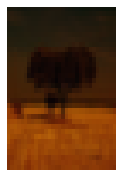

bed
energy_der: 5.57


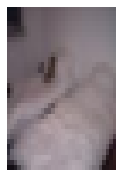

streetcar
energy_der: 7.48


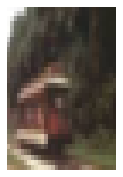

snail
energy_der: 5.15


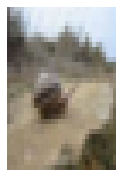

shrew
energy_der: 5.58


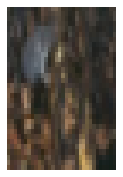

In [92]:
#badimg=[x for x in range(len(g)) if g[x] <3] 
classorder=[]
for bi in badimg: 
    clas=ls[bi][0]
    if clas not in classorder: classorder.append(clas)
    print(dset_real.classes[clas],"\nenergy_der: ",g[bi].round(2),sep='')
    plt.figure(figsize=[3,3])
    npimg = imgs[bi]
    npimg = np.rot90(np.transpose(npimg)[:,:,:,0],k=3)
    plt.imshow(npimg,extent=[0,32,0,48],interpolation=None) 
    plt.axis('off')
    plt.show()

In [93]:
classorder

[60, 5, 81, 77, 74]

In [94]:
badclasses = classorder
print(badclasses)
print([dset_real.classes[i] for i in badclasses])
ls = np.vstack(ls)
print(ls)

[60, 5, 81, 77, 74]
['plain', 'bed', 'streetcar', 'snail', 'shrew']
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


plain
energy_der: 0.09


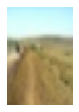

plain
energy_der: 0.05


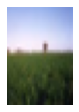

plain
energy_der: 0.05


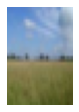

plain
energy_der: 0.04


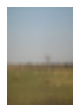

plain
energy_der: 0.04


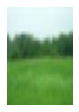

bed
energy_der: 0.06


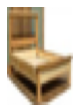

bed
energy_der: 0.09


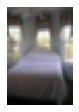

bed
energy_der: 0.08


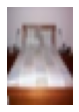

bed
energy_der: 0.06


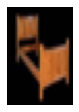

bed
energy_der: 0.07


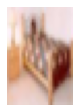

streetcar
energy_der: 0.08


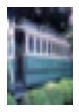

streetcar
energy_der: 0.07


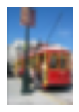

streetcar
energy_der: 0.07


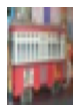

streetcar
energy_der: 0.05


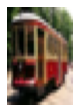

streetcar
energy_der: 0.07


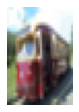

snail
energy_der: 0.1


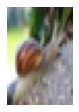

snail
energy_der: 0.06


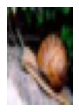

snail
energy_der: 0.1


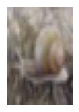

snail
energy_der: 0.07


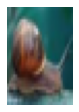

snail
energy_der: 0.08


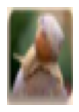

shrew
energy_der: 0.09


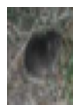

shrew
energy_der: 0.08


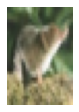

shrew
energy_der: 0.08


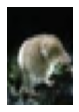

shrew
energy_der: 0.09


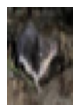

shrew
energy_der: 0.09


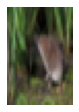

In [98]:
snum=5
for bc in badclasses:
    samples = random.choices([i for i, x in enumerate(ls) if x==bc and g[i]<0.1],k=snum)
    for s in samples:
        print(dset_real.classes[ls[s][0]],"\nenergy_der: ",g[s].round(2),sep='')
        plt.figure(figsize=[1.8,1.8])
        npimg = imgs[s]
        npimg = np.rot90(np.transpose(npimg)[:,:,:,0],k=3)
        plt.imshow(npimg,extent=[0,32,0,48],interpolation=None) 
        plt.axis('off')
        plt.show()


In [75]:
[i for i,x in enumerate(ls) if x==5]

[334,
 441,
 459,
 657,
 1142,
 1206,
 1219,
 1272,
 1274,
 1314,
 1331,
 1333,
 1389,
 1402,
 1579,
 1691,
 1734,
 1813,
 2044,
 2062,
 2068,
 2251,
 2348,
 2378,
 2382,
 2392,
 2422,
 2558,
 2581,
 2607,
 2765,
 2771,
 2787,
 2848,
 2922,
 2928,
 2944,
 3260,
 3448,
 3753,
 3780,
 3793,
 3925,
 4024,
 4223,
 4226,
 4409,
 4480,
 4518,
 4699,
 4829,
 4937,
 5054,
 5101,
 5146,
 5230,
 5239,
 5415,
 5549,
 5580,
 5647,
 5776,
 6082,
 6138,
 6193,
 6289,
 6341,
 6368,
 6408,
 6477,
 6591,
 6813,
 7126,
 7223,
 7344,
 7366,
 7622,
 7681,
 7690,
 7794,
 7885,
 7895,
 7934,
 7967,
 8071,
 8089,
 8281,
 8298,
 8554,
 8670,
 8786,
 8814,
 9217,
 9279,
 9452,
 9580,
 9617,
 9619,
 9753,
 9801]

In [90]:
max(ls)

array([99])

In [43]:
np.max([[1,2],[3,4]],axis=0)

array([3, 4])